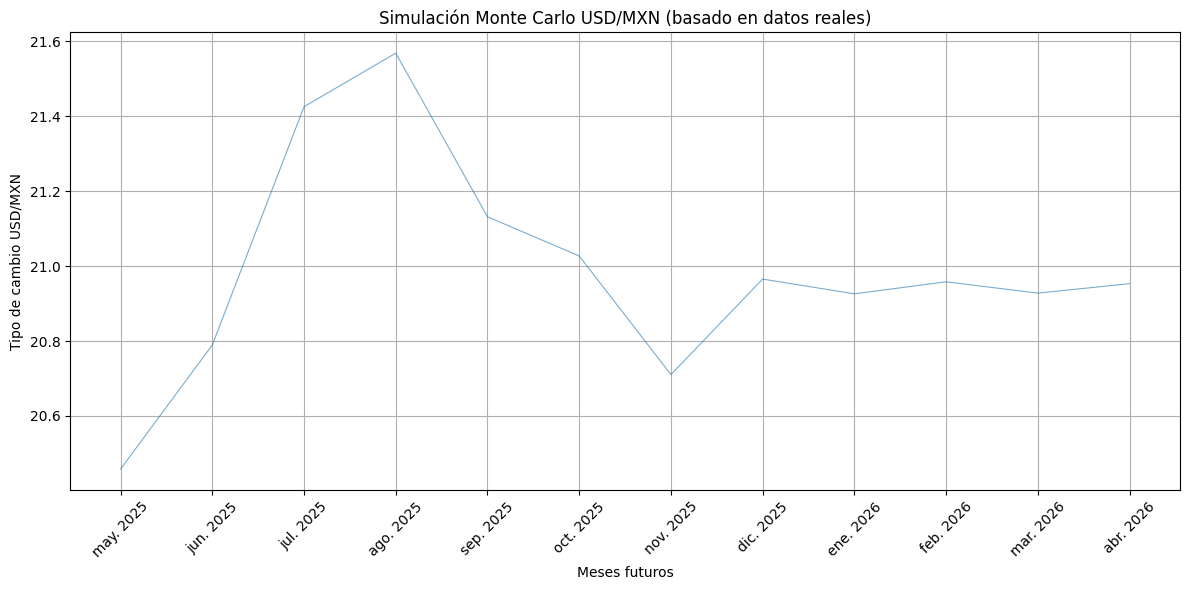

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

usdmxn = [
    20.17575, 20.1075, 19.48725, 18.056, 17.1505, 17.3785,
    17.9345, 16.62175, 18.2855, 19.602, 20.79275, 20.45825
]


prices = pd.Series(usdmxn)
returns = np.log(prices / prices.shift(1)).dropna()
mu = returns.mean()
sigma = returns.std()

# Simulación Monte Carlo mensual
S0 = prices.iloc[-1]
N = 12  # meses
T = 1   # año
n_sim = 1
dt = T / N

simulations = np.zeros((N, n_sim))

for i in range(n_sim):
    path = np.zeros(N)
    path[0] = S0
    for t in range(1, N):
        shock = np.random.normal((mu - 0.5 * sigma**2) * dt, sigma * np.sqrt(dt))
        path[t] = path[t - 1] * np.exp(shock)
    simulations[:, i] = path

start_month = datetime.datetime.now().replace(day=1)
months_labels = pd.date_range(start=start_month, periods=N, freq='MS').strftime('%b %Y')

# Graficar resultados
plt.figure(figsize=(12, 6))
for i in range(n_sim):
    plt.plot(simulations[:, i], lw=0.8, alpha=0.6)


plt.title('Simulación Monte Carlo USD/MXN (basado en datos reales)')
plt.xlabel('Meses futuros')
plt.ylabel('Tipo de cambio USD/MXN')
plt.xticks(ticks=np.arange(N), labels=months_labels, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



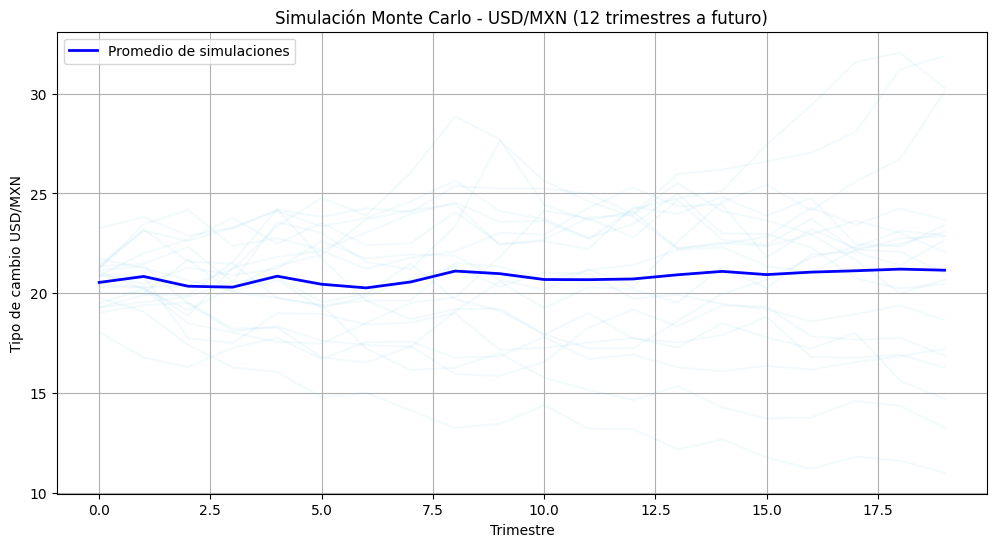

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la imagen (tipo de cambio USD/MXN trimestral)
tc = np.array([
    20.17575, 20.1075, 19.48725, 18.056, 17.1505, 17.3785,
    16.9345, 16.62175, 18.2855, 19.602, 20.79275, 20.45825
])

# 1. Calcular los rendimientos logarítmicos
log_returns = np.diff(np.log(tc))

# 2. Calcular media y desviación estándar
mu = np.mean(log_returns)
sigma = np.std(log_returns)

# 3. Parámetros de la simulación
n_simulaciones = 20
horizonte = 20
ultimo_valor = tc[-1]

# 4. Simulación Monte Carlo
simulaciones = np.zeros((horizonte, n_simulaciones))
for i in range(n_simulaciones):
    shocks = np.random.normal(loc=(mu - 0.5 * sigma**2), scale=sigma, size=horizonte)
    simulacion = ultimo_valor * np.exp(np.cumsum(shocks))
    simulaciones[:, i] = simulacion

# 5. Graficar las simulaciones
plt.figure(figsize=(12, 6))
plt.plot(simulaciones, color='skyblue', alpha=0.1)
plt.plot(np.mean(simulaciones, axis=1), color='blue', label='Promedio de simulaciones', linewidth=2)
plt.title('Simulación Monte Carlo - USD/MXN (12 trimestres a futuro)')
plt.xlabel('Trimestre')
plt.ylabel('Tipo de cambio USD/MXN')
plt.grid(True)
plt.legend()
plt.show()


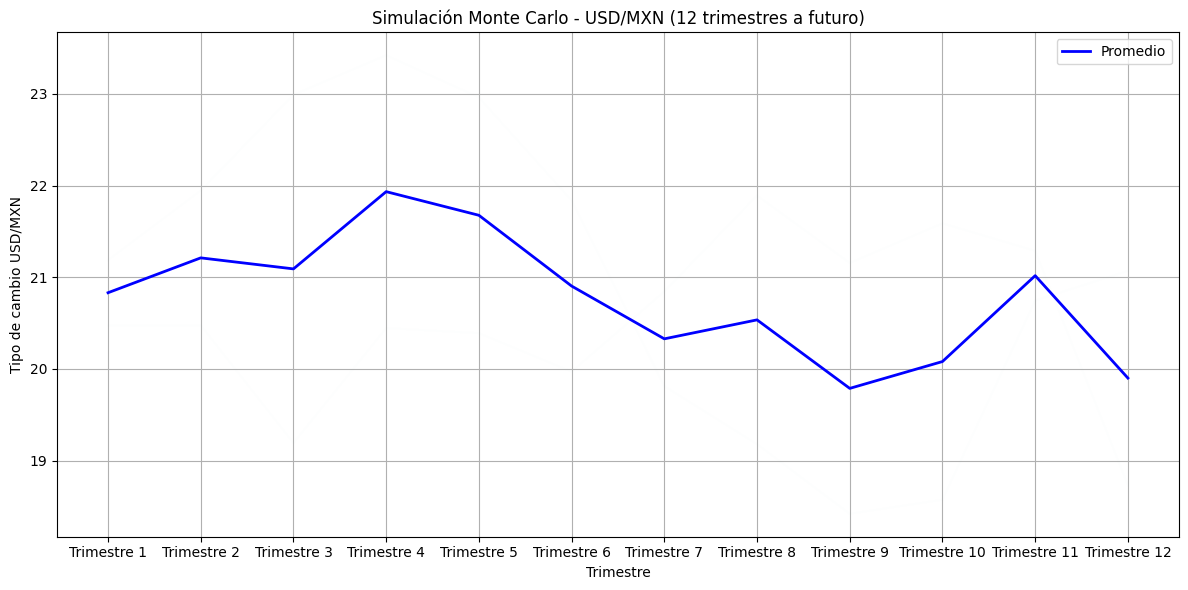

             Simulación 1  Simulación 2   Promedio  Percentil_5  Percentil_95
Trimestre 1     20.475489     21.186713  20.831101    20.511050     21.151152
Trimestre 2     20.476682     21.945939  21.211310    20.550145     21.872476
Trimestre 3     19.192078     22.990142  21.091110    19.381981     22.800239
Trimestre 4     20.446020     23.420878  21.933449    20.594763     23.272135
Trimestre 5     20.390024     22.961432  21.675728    20.518594     22.832862


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos históricos trimestrales del tipo de cambio USD/MXN
tc = np.array([
    20.17575, 20.1075, 19.48725, 18.056, 17.1505, 17.3785,
    16.9345, 16.62175, 18.2855, 19.602, 20.79275, 20.45825
])

# Calcular rendimientos logarítmicos
log_returns = np.diff(np.log(tc))
mu = np.mean(log_returns)
sigma = np.std(log_returns)

# Parámetros de simulación
n_simulaciones = 2
horizonte = 12  # trimestres a futuro
ultimo_valor = tc[-1]

# Simulación Monte Carlo
simulaciones = np.zeros((horizonte, n_simulaciones))
for i in range(n_simulaciones):
    shocks = np.random.normal(loc=(mu - 0.5 * sigma**2), scale=sigma, size=horizonte)
    simulacion = ultimo_valor * np.exp(np.cumsum(shocks))
    simulaciones[:, i] = simulacion

# Crear DataFrame de simulaciones
df_simulaciones = pd.DataFrame(
    simulaciones,
    index=[f"Trimestre {i+1}" for i in range(horizonte)],
    columns=[f"Simulación {j+1}" for j in range(n_simulaciones)]
)

# Calcular estadísticos por trimestre
df_estadisticos = pd.DataFrame({
    'Promedio': df_simulaciones.mean(axis=1),
    'Percentil_5': df_simulaciones.quantile(0.05, axis=1),
    'Percentil_95': df_simulaciones.quantile(0.95, axis=1)
}, index=df_simulaciones.index)

# Graficar simulaciones
plt.figure(figsize=(12, 6))
plt.plot(df_simulaciones, color='skyblue', alpha=0.01)
plt.plot(df_estadisticos['Promedio'], color='blue', label='Promedio', linewidth=2)

plt.title('Simulación Monte Carlo - USD/MXN (12 trimestres a futuro)')
plt.xlabel('Trimestre')
plt.ylabel('Tipo de cambio USD/MXN')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


df_resultado = pd.concat([df_simulaciones, df_estadisticos], axis=1)
print(df_resultado.head())  



In [71]:
# Parámetros ajustados para simulación diaria
dias_totales = 252  # Aproximadamente 1 año laboral
horizonte_dias = dias_totales  # 1 año de simulación (hasta junio 2025 aprox.)
n_simulaciones = 500  # Aumenta simulaciones para más robustez

# Simulación Monte Carlo diaria
simulaciones_d = np.zeros((horizonte_dias, n_simulaciones))
for i in range(n_simulaciones):
    shocks = np.random.normal(loc=(mu / 63 - 0.5 * (sigma / np.sqrt(63))**2),
                              scale=sigma / np.sqrt(63), size=horizonte_dias)
    simulacion = ultimo_valor * np.exp(np.cumsum(shocks))
    simulaciones_d[:, i] = simulacion

# Índices diarios (puedes ajustar fechas reales si quieres)
fechas = pd.date_range(start='2025-04-01', periods=horizonte_dias, freq='B')  # días hábiles

# Promedios y percentiles diarios
df_sim_d = pd.DataFrame(simulaciones_d, index=fechas)
df_stats_d = pd.DataFrame({
    'Promedio': df_sim_d.mean(axis=1),
    'P5': df_sim_d.quantile(0.05, axis=1),
    'P95': df_sim_d.quantile(0.95, axis=1)
})

# Valor estimado para el 30 de junio 2025 (último día hábil)
estimado_junio = df_stats_d.loc['2025-06-30']
print("Estimación para el 30 de junio 2025:")
print(estimado_junio)


Estimación para el 30 de junio 2025:
Promedio    20.428044
P5          18.922231
P95         22.101277
Name: 2025-06-30 00:00:00, dtype: float64


Estimación para el 30 de junio 2025:
count    10000.000000
mean        20.173105
std          1.065525
min         15.965395
5%          18.493779
50%         20.140218
95%         21.975284
max         25.112461
Name: 30 Jun 2025, dtype: float64


C:\Users\ppmel\AppData\Local\Temp\ipykernel_16408\564346984.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(dates, dayfirst=True)[::-1]  # Reversa para orden cronológico


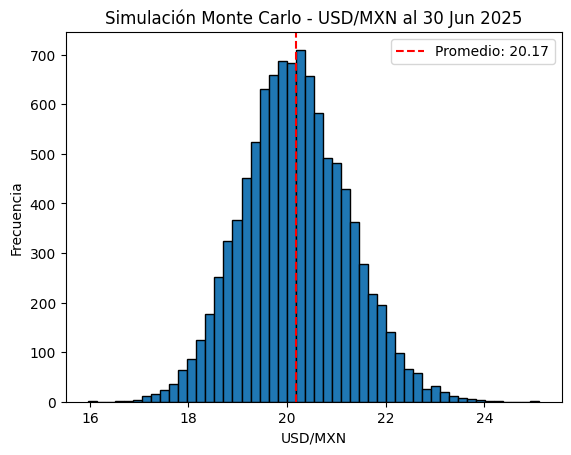

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos históricos
dates = [
    "30 Jun 2022", "30 Sep 2022", "30 Dec 2022", "31 Mar 2023", "30 Jun 2023", "29 Sep 2023",
    "29 Dec 2023", "29 Mar 2024", "28 Jun 2024", "30 Sep 2024", "31 Dec 2024", "31 Mar 2025"
]
# Convertimos las fechas en orden cronológico (sin especificar el formato)
dates = pd.to_datetime(dates, dayfirst=True)[::-1]  # Reversa para orden cronológico

rates = [
    20.17575, 20.1075, 19.48725, 18.056, 17.1505, 17.3785,
    16.9345, 16.62175, 18.2855, 19.602, 20.79275, 20.45825
][::-1]  # También en orden cronológico

df = pd.DataFrame({'Fecha': dates, 'USD_MXN': rates})
df.set_index('Fecha', inplace=True)

# Calcular rendimientos logarítmicos
df['log_return'] = np.log(df['USD_MXN'] / df['USD_MXN'].shift(1))
mu = df['log_return'].mean()
sigma = df['log_return'].std()

# Simulación Monte Carlo hacia 30 Jun 2025
num_simulations = 10000
num_periods = 1  # un trimestre más

last_rate = df['USD_MXN'].iloc[-1]
simulations = last_rate * np.exp((mu - 0.5 * sigma**2) * num_periods + sigma * np.sqrt(num_periods) * np.random.randn(num_simulations))

# Resultados
estimacion = pd.Series(simulations, name='30 Jun 2025')
print("Estimación para el 30 de junio 2025:")
print(estimacion.describe(percentiles=[0.05, 0.95]))

# Visualizar
plt.hist(simulations, bins=50, edgecolor='black')
plt.axvline(simulations.mean(), color='red', linestyle='dashed', label=f'Promedio: {simulations.mean():.2f}')
plt.title('Simulación Monte Carlo - USD/MXN al 30 Jun 2025')
plt.xlabel('USD/MXN')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


C:\Users\ppmel\AppData\Local\Temp\ipykernel_16408\1977946771.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(dates, dayfirst=True)[::-1]  # Reversa para orden cronológico


Estimación diaria para junio 2025:
             Promedio  Percentil_5  Percentil_95
2025-06-01  20.175750    20.175750     20.175750
2025-06-02  20.174102    20.064700     20.280310
2025-06-03  20.172633    20.021039     20.329420
2025-06-04  20.172207    19.980232     20.356610
2025-06-05  20.172754    19.958380     20.383853
2025-06-06  20.172214    19.933459     20.420747
2025-06-07  20.173487    19.924004     20.439317
2025-06-08  20.172485    19.886094     20.448945
2025-06-09  20.166963    19.847502     20.461487
2025-06-10  20.165577    19.824138     20.486712
2025-06-11  20.164439    19.812342     20.493660
2025-06-12  20.163504    19.796307     20.510674
2025-06-13  20.168138    19.776388     20.526569
2025-06-14  20.171050    19.791476     20.550552
2025-06-15  20.171923    19.747012     20.577277
2025-06-16  20.172921    19.737025     20.591817
2025-06-17  20.169267    19.717835     20.611312
2025-06-18  20.168937    19.693559     20.603946
2025-06-19  20.165853    19.670015

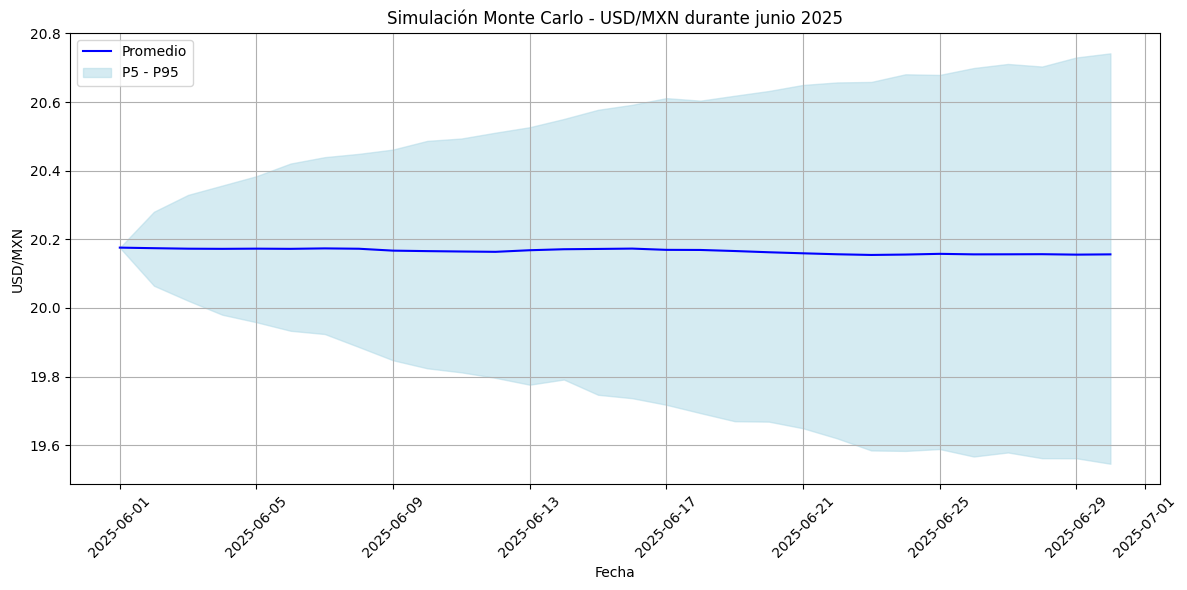

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos históricos
dates = [
    "30 Jun 2022", "30 Sep 2022", "30 Dec 2022", "31 Mar 2023", "30 Jun 2023", "29 Sep 2023",
    "29 Dec 2023", "29 Mar 2024", "28 Jun 2024", "30 Sep 2024", "31 Dec 2024", "31 Mar 2025"
]
# Conversión de fechas
dates = pd.to_datetime(dates, dayfirst=True)[::-1]  # Reversa para orden cronológico

rates = [
    20.17575, 20.1075, 19.48725, 18.056, 17.1505, 17.3785,
    16.9345, 16.62175, 18.2855, 19.602, 20.79275, 20.45825
][::-1]  # También en orden cronológico

df = pd.DataFrame({'Fecha': dates, 'USD_MXN': rates})
df.set_index('Fecha', inplace=True)

# Calcular rendimientos logarítmicos
df['log_return'] = np.log(df['USD_MXN'] / df['USD_MXN'].shift(1))
mu = df['log_return'].mean()
sigma = df['log_return'].std()

# Parámetros de simulación
num_simulations = 1000
num_days = 30  # días de junio
dt = 1 / 252  # supondremos 252 días hábiles al año

last_rate = df['USD_MXN'].iloc[-1]

# Simulación Monte Carlo
simulaciones = np.zeros((num_days, num_simulations))
simulaciones[0] = last_rate

for t in range(1, num_days):
    z = np.random.randn(num_simulations)
    simulaciones[t] = simulaciones[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

# Crear DataFrame con fechas
fechas_junio = pd.date_range(start='2025-06-01', periods=num_days, freq='D')
df_sim = pd.DataFrame(simulaciones, index=fechas_junio)

# Estadísticas
promedio = df_sim.mean(axis=1)
p5 = df_sim.quantile(0.05, axis=1)
p95 = df_sim.quantile(0.95, axis=1)

# Consolidar
resultados = pd.DataFrame({
    'Promedio': promedio,
    'Percentil_5': p5,
    'Percentil_95': p95
})

# Mostrar resultados para los últimos días
print("Estimación diaria para junio 2025:")
print(resultados)

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(resultados.index, promedio, label='Promedio', color='blue')
plt.fill_between(resultados.index, p5, p95, color='lightblue', alpha=0.5, label='P5 - P95')
plt.title('Simulación Monte Carlo - USD/MXN durante junio 2025')
plt.xlabel('Fecha')
plt.ylabel('USD/MXN')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TODAS LAS SIMULACIONES PARA CADA DÍA DE JUNIO 2025:
            Simulación_1
2025-06-01     20.175750
2025-06-02     20.171567
2025-06-03     20.142250
2025-06-04     20.246203
2025-06-05     20.231819
2025-06-06     20.119554
2025-06-07     20.145548
2025-06-08     20.120468
2025-06-09     20.146076
2025-06-10     20.052485
2025-06-11     20.052661
2025-06-12     19.987313
2025-06-13     19.920519
2025-06-14     19.951745
2025-06-15     19.942738
2025-06-16     19.925625
2025-06-17     19.893950
2025-06-18     19.875870
2025-06-19     19.851921
2025-06-20     19.853575
2025-06-21     19.898311
2025-06-22     19.925098
2025-06-23     19.790109
2025-06-24     19.793252
2025-06-25     19.720159
2025-06-26     19.715630
2025-06-27     19.789194
2025-06-28     19.720209
2025-06-29     19.589130
2025-06-30     19.598567


C:\Users\ppmel\AppData\Local\Temp\ipykernel_16408\2802399296.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(dates, dayfirst=True)[::-1]


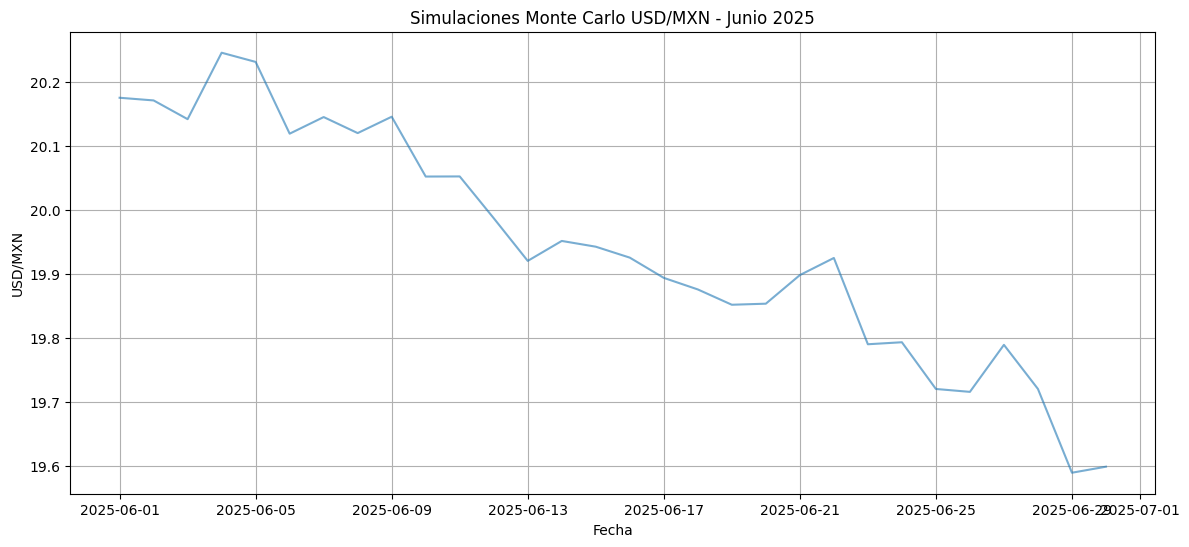

In [83]:

dates = [
    "30 Jun 2022", "30 Sep 2022", "30 Dec 2022", "31 Mar 2023", "30 Jun 2023", "29 Sep 2023",
    "29 Dec 2023", "29 Mar 2024", "28 Jun 2024", "30 Sep 2024", "31 Dec 2024", "31 Mar 2025"
]
dates = pd.to_datetime(dates, dayfirst=True)[::-1]

rates = [
    20.17575, 20.1075, 19.48725, 18.056, 17.1505, 17.3785,
    16.9345, 16.62175, 18.2855, 19.602, 20.79275, 20.45825
][::-1]

df = pd.DataFrame({'Fecha': dates, 'USD_MXN': rates})
df.set_index('Fecha', inplace=True)

# Cálculo de rendimientos logarítmicos
df['log_return'] = np.log(df['USD_MXN'] / df['USD_MXN'].shift(1))
mu = df['log_return'].mean()
sigma = df['log_return'].std()

# Parámetros de simulación
num_simulations = 1
num_days = 30
dt = 1 / 252
last_rate = df['USD_MXN'].iloc[-1]

# Simulaciones Monte Carlo
simulaciones = np.zeros((num_days, num_simulations))
simulaciones[0] = last_rate

for t in range(1, num_days):
    z = np.random.randn(num_simulations)
    simulaciones[t] = simulaciones[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

# Fechas para junio 2025
fechas_junio = pd.date_range(start='2025-06-01', periods=num_days, freq='D')

# Crear DataFrame con TODAS las simulaciones
df_simulaciones_completas = pd.DataFrame(simulaciones, index=fechas_junio)
df_simulaciones_completas.columns = [f'Simulación_{i+1}' for i in range(num_simulations)]

# Mostrar todas las simulaciones (puedes limitar cuántas se imprimen en pantalla si es mucho)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("TODAS LAS SIMULACIONES PARA CADA DÍA DE JUNIO 2025:")
print(df_simulaciones_completas)


# Visualizar algunas trayectorias
plt.figure(figsize=(14, 6))
for i in range(1): # solo graficar 10 trayectorias para claridad
    plt.plot(fechas_junio, df_simulaciones_completas.iloc[:, i], alpha=0.6)
plt.title('Simulaciones Monte Carlo USD/MXN - Junio 2025')
plt.xlabel('Fecha')
plt.ylabel('USD/MXN')
plt.grid(True)
plt.show()


In [84]:
tabla_para_copiar = df_simulaciones_completas.iloc[:, :10].copy()
tabla_para_copiar.index.name = 'Fecha'
tabla_para_copiar.reset_index(inplace=True)

# Redondear para facilitar la lectura
tabla_para_copiar = tabla_para_copiar.round(4)

# Mostrar como tabla copiable
print("COPIA ESTA TABLA:")
print(tabla_para_copiar.to_string(index=False))

COPIA ESTA TABLA:
     Fecha  Simulación_1
2025-06-01       20.1758
2025-06-02       20.1716
2025-06-03       20.1422
2025-06-04       20.2462
2025-06-05       20.2318
2025-06-06       20.1196
2025-06-07       20.1455
2025-06-08       20.1205
2025-06-09       20.1461
2025-06-10       20.0525
2025-06-11       20.0527
2025-06-12       19.9873
2025-06-13       19.9205
2025-06-14       19.9517
2025-06-15       19.9427
2025-06-16       19.9256
2025-06-17       19.8940
2025-06-18       19.8759
2025-06-19       19.8519
2025-06-20       19.8536
2025-06-21       19.8983
2025-06-22       19.9251
2025-06-23       19.7901
2025-06-24       19.7933
2025-06-25       19.7202
2025-06-26       19.7156
2025-06-27       19.7892
2025-06-28       19.7202
2025-06-29       19.5891
2025-06-30       19.5986


In [88]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import openpyxl
nombre_archivo = "simulaciones_junio2025.xlsx"
df_simulaciones_completas.to_excel(nombre_archivo)

print(f"✅ Archivo '{nombre_archivo}' creado exitosamente.")

✅ Archivo 'simulaciones_junio2025.xlsx' creado exitosamente.
